# 作業

作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [1]:
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #專門用來畫3D圖
from sklearn.cluster import KMeans
import matplotlib
np.random.seed(5)
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

# 載入 相關套件 並 執行 kmean 實驗 ...

實驗測試不同的群數
<br>實驗測試不同的初始值
<br>呈現結果

In [2]:
estimators=[('k_mean_8',KMeans(n_clusters=8)),
           ('k_means_3',KMeans(n_clusters=3)),
           ('k_means_bad_init',KMeans(n_clusters=3,n_init=1,init='random'))]
#init 初始化方法設為random,初始centroid 隨機從資料點選
#n_init Kmeans跑n次不一樣的centroid
print(estimators)

[('k_mean_8', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)), ('k_means_3', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)), ('k_means_bad_init', KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0))]

































資料建模 並視覺化結果


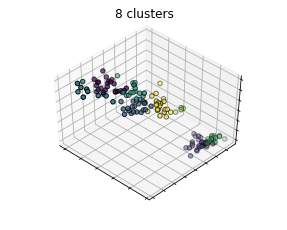

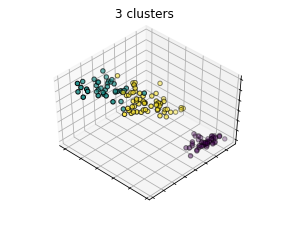

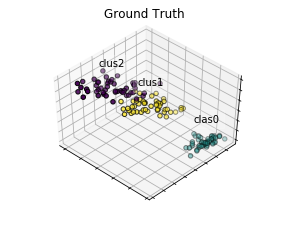

<Figure size 288x216 with 0 Axes>

In [3]:
fignum=1
titles=['8 clusters','3 clusters','3 clusters,bad initialization']
for name,est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax=Axes3D(fig,rect=[0,0,.95,1],elev=48,azim=134)
    est.fit(X)
    labels=est.labels_
    ax.scatter(X[:,3],X[:,0],X[:,2],
              c=labels.astype(np.float),edgecolor='k')
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum-1])
    ax.dist=12
    fignum=fignum+1
#plot the ground truth
fog=plt.figure(fignum,figsize=(4,3))
ax=Axes3D(fig,rect=[0,0,.95,1],elev=48,azim=134)
for name,label in [('clas0',0),
                   ('clus1',1),
                   ('clus2',2)]:
    ax.text3D(X[y==label,3].mean(),
              X[y==label,0].mean(),
              X[y==label,2].mean()+2,name,
              horizontalalignment='center',
              bbox=dict(alpha=.2,edgecolor='w',facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

#fig.show()